# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [45]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

sales_mean = sum(sales) / len(sales)

# variance numerator
var_num = 0

# loop to make variance numerator
for sale in sales:
  var_num += ((sale - sales_mean)**2)

variance = var_num / (len(sales) - 1)

standard_dev = variance**(0.5)

print("Mean: %f\nVariance: %f\nStd Deviation: %f\n" % 
      (sales_mean, variance, standard_dev))

Mean: 3052.714286
Variance: 214387.904762
Std Deviation: 463.020415



## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [46]:
import pandas as pd

# make a df out of the data
customers = [127, 80, 105, 92, 120, 115, 93]

store_data = {'sales': sales, 'customers': customers}

df = pd.DataFrame(store_data)

df.cov()

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
# get mean
c_mean = sum(customers) / len(customers)

# get variance
c_num = 0

# loop to make variance numerator
for customer in customers:
  c_num += ((customer - c_mean)**2)

c_variance = c_num / (len(customers) - 1)

c_std_dev = c_variance**(0.5)

In [50]:
# find covariance

# sum up covariance formula numerator
cov_num = 0

for o in range(len(sales)):
  cov_num += (sales[o] - sales_mean) * (customers[o] - c_mean)

# covariance
store_cov = cov_num / (len(sales) - 1)

# correlation coefficient
co_co = store_cov / (standard_dev * c_std_dev)

co_co

# given the correlation coefficient 
# it looks like the relationship between
# sales and customers is positive

0.9628339778148909

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [52]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

# variance-covariance matrix
titanic.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [53]:
# correlation matrix
titanic.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

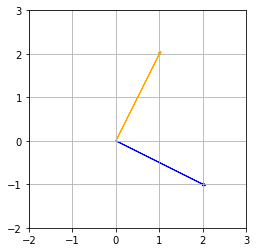

In [80]:
import matplotlib.pyplot as plt
# define orthogonal vectors
# dot product (1 * 2) + (2 * -1) = (2) + (-2) = 0
v1 = [1, 2]
v2 = [2, -1]

fig, ax = plt.subplots()

ax.grid(b=True)

ax.arrow(0, 0, v1[0], v1[1], head_width=0.07, head_length=0.07, color='orange')
ax.arrow(0, 0, v2[0], v2[1], head_width=0.07, head_length=0.07, color='blue')
ax.set_xlim(-2, 3)
ax.set_ylim(-2, 3)

ax.set_aspect('equal')


plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [83]:
a = [-5, 3, 7]
b = [6, -8, 2]

# (-5*6)+(3*-8)+(7*2) = -40
np.dot(a, b)

# the vectors are not orthogonal
# because the dot product is not zero

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [93]:
from numpy import linalg as LA
c = np.array([2, -15, 6, 20])

# ||c||^2
norm_c = LA.norm(c)
norm_c_sqr = norm_c**2

# c dot c
c_dot_c = np.dot(c, c)

# c transpose c
ctc = np.matmul(c.T, c)

print(norm_c_sqr)
print(c_dot_c)
print(ctc)

# they are all the same value 

665.0
665
665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

## d as a linear combination of scalars and unit vectors
\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 
1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} =
7\hat{i} + 12\hat{j}
\end{align}

## And for e
\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 
1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0\end{bmatrix} 
 + -8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} + 
 -8\hat{k}
\end{align}




## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [101]:
# doing this manually to make sure I understand
f = [4, 12, 11, 9, 2]

squares_f = [x**2 for x in f]

# sum of squares
sos = sum(squares_f)

# get the norm
f_norm = sos**(0.5)

# 1 divided by the norm, to be multiplied by each element
fraction = 1 / f_norm

unit_vector = np.array([x * fraction for x in f])

print(unit_vector)

# check if this was right by dividing f by its norm
print(f / LA.norm(f))

# check if unit_vector equals 1
LA.norm(unit_vector)

# 0.9999999999999999 almost 1

[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]
[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


0.9999999999999999

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

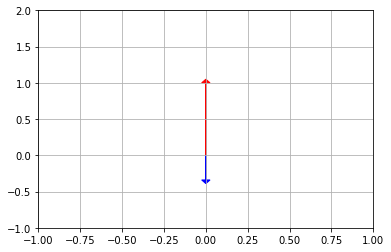

In [114]:
# linearly dependent vectors

# define vectors
ld1 = [0, 1]
ld2 = np.multiply(-0.34, ld1)

# set bounds
plt.xlim(-1, 1)
plt.ylim(-1, 2)

# show grid
plt.grid(b=True)


plt.arrow(0, 0, ld1[0], ld1[1], head_width=0.05, head_length=0.05, color='red')
plt.arrow(0, 0, ld2[0], ld2[1], head_width=0.05, head_length=0.05, color='blue')

plt.show()

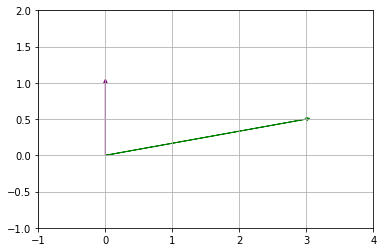

In [116]:
# linearly independent vectors

# define vectors
li1 = [0, 1]
li2 = [3, 0.5]

# set bounds
plt.xlim(-1, 4)
plt.ylim(-1, 2)

# show grid
plt.grid(b=True)


plt.arrow(0, 0, li1[0], li1[1], head_width=0.05, head_length=0.05, color='purple')
plt.arrow(0, 0, li2[0], li2[1], head_width=0.05, head_length=0.05, color='green')

plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

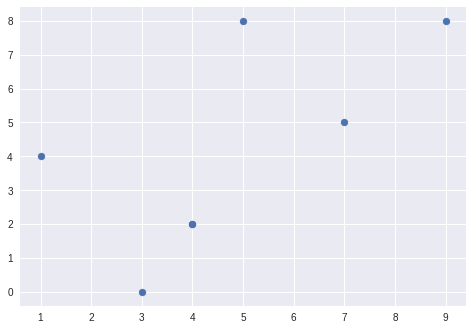

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()